In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.0,
        zoom_range=0.0,
        horizontal_flip=False)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.0,
        zoom_range=0.0,
        horizontal_flip=False)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.0,
        zoom_range=0.0,
        horizontal_flip=False)

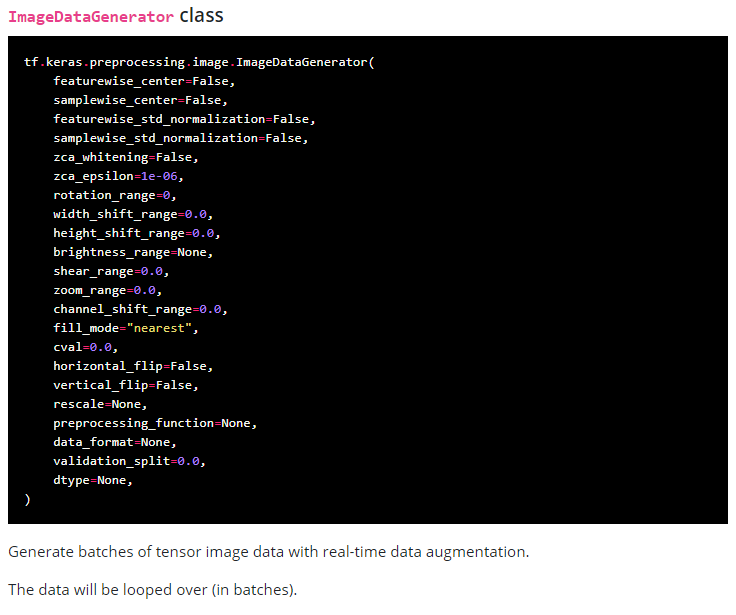

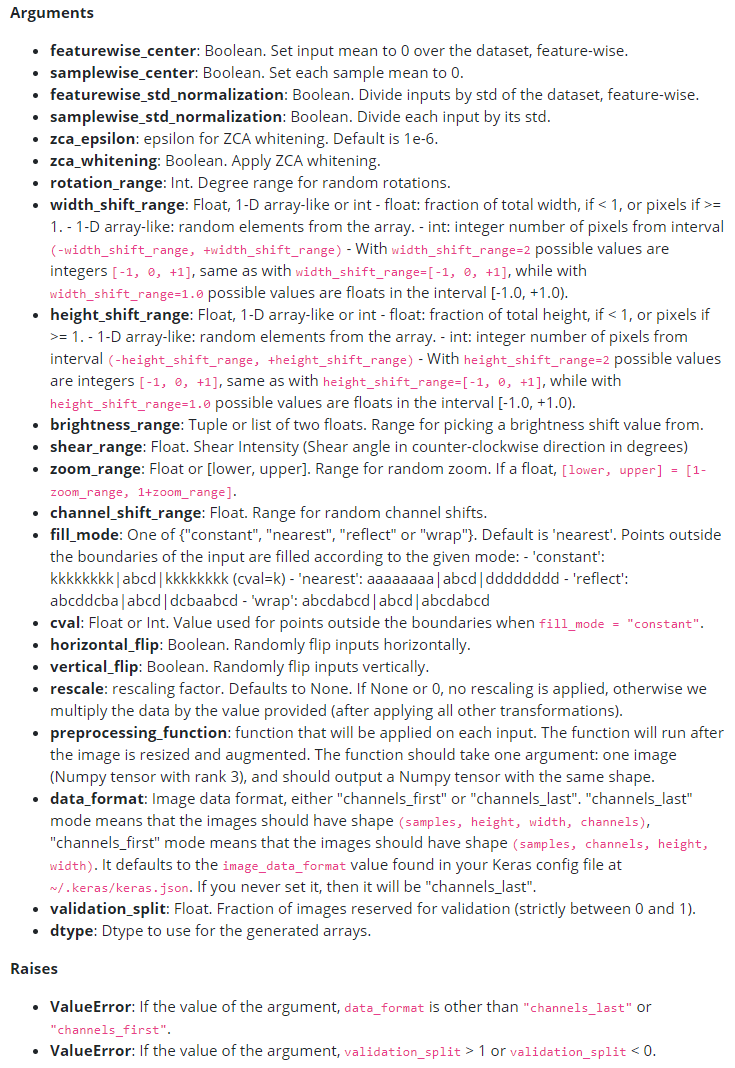

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=r'C:\Users\Agustin\Documents\VpC2_Datasets\Clase2\perros_y_gatos\train',
    target_size=(600, 600),
    classes = ['dogs', 'cats'],
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
    )

valid_generator = valid_datagen.flow_from_directory(
    directory=r'C:\Users\Agustin\Documents\VpC2_Datasets\Clase2\perros_y_gatos\validation',
    target_size=(600, 600),
    classes = ['dogs', 'cats'],
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
    )

test_generator = test_datagen.flow_from_directory(
    directory=r'C:\Users\Agustin\Documents\VpC2_Datasets\Clase2\perros_y_gatos\validation',
    target_size=(600, 600),
    classes = ['dogs', 'cats'],
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


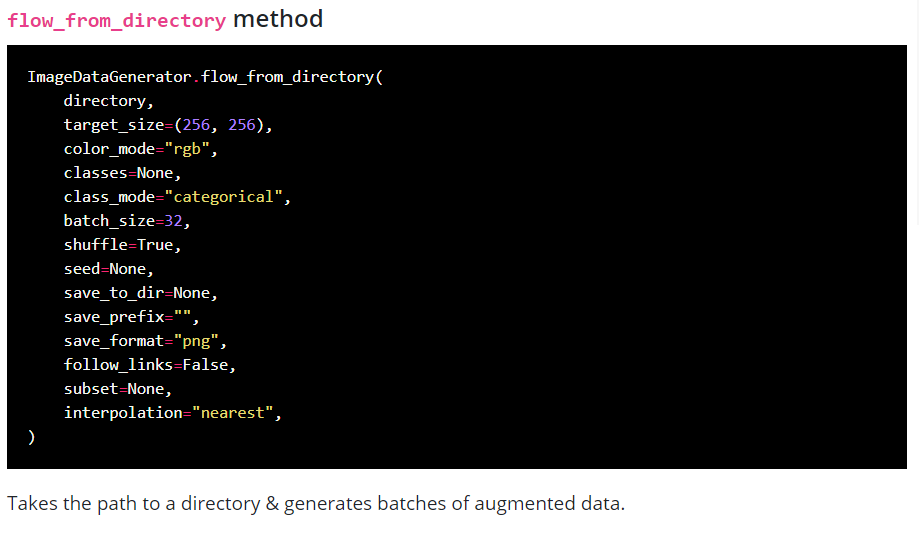

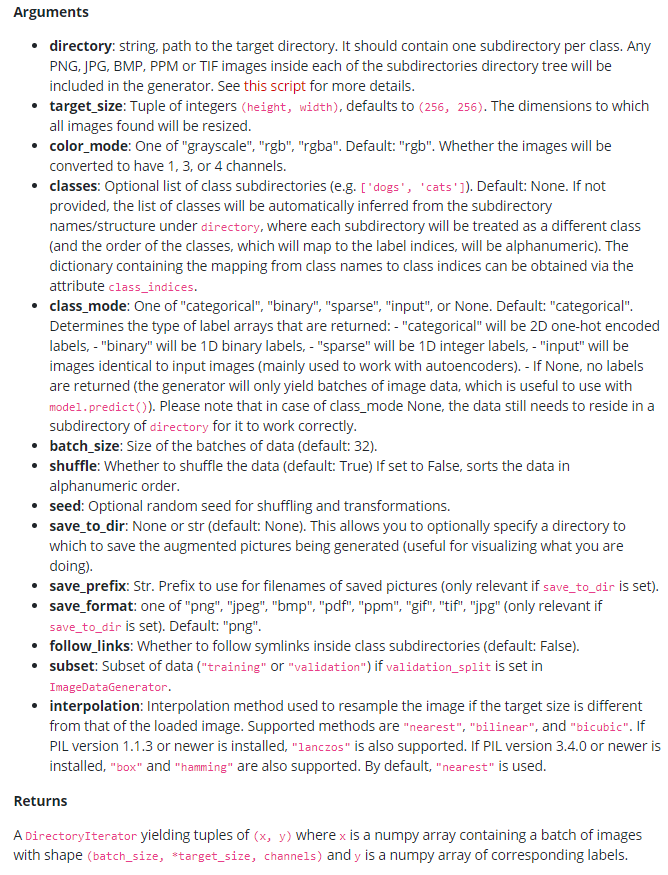

In [17]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(600, 600, 3)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(300, 300, 3)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 600, 600, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 300, 300, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 720000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               216000300 
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

In [19]:
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
nb_train_samples = 1000
nb_validation_samples = 500
epochs = 5
batch_size = 32

In [23]:
model_history_a = model_a.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
31/31 [==============================] - 194s 6s/step - loss: 0.7060 - accuracy: 0.5307 - val_loss: 0.6822 - val_accuracy: 0.5292
Epoch 2/5
31/31 [==============================] - 156s 5s/step - loss: 0.6897 - accuracy: 0.5413 - val_loss: 0.6895 - val_accuracy: 0.5417
Epoch 3/5
31/31 [==============================] - 146s 5s/step - loss: 0.6833 - accuracy: 0.5877 - val_loss: 0.6830 - val_accuracy: 0.5729
Epoch 4/5
31/31 [==============================] - 143s 5s/step - loss: 0.6931 - accuracy: 0.5512 - val_loss: 0.6726 - val_accuracy: 0.5625
Epoch 5/5
31/31 [==============================] - 144s 5s/step - loss: 0.6885 - accuracy: 0.5736 - val_loss: 0.7510 - val_accuracy: 0.5167


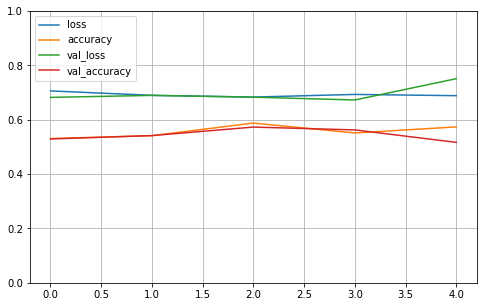

In [24]:
import pandas as pd

pd.DataFrame(model_history_a.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
ev = model_a.evaluate(test_generator)

32/32 [==============================] - 29s 907ms/step - loss: 0.7604 - accuracy: 0.5000


**Bibliografia**

https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

https://keras.io/api/preprocessing/image/#flowfromdirectory-method
